## Tugas Besar 2 Intelegensia Buatan

Kelompok 5 - DoorDash :
<br>
Thareq Muhammad Yusuf Hasnul A / 13516004;
<br>
Albert Sahala Theodore / 13516022;
<br>
Dandy Arif Rahman / 13516086;
<br>
Tanor Abraham Reyuko / 13516088;
<br>
Hagai Raja Sinulingga / 13516136;

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

## Pembacaan Dataset

In [2]:
data_test = pd.read_csv("tubes2_HeartDisease_test.csv")
data_train = pd.read_csv("tubes2_HeartDisease_train.csv")

Converting to Float

In [3]:
cols = data_train.columns
for c in cols:
    data_train[c] = pd.to_numeric(data_train[c], errors='coerce')

In [4]:
data_train.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,NaN,6.0,3


In [5]:
data_test.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13
0,60,1,2,160,267,1,1,157,0,0.5,2,?,?
1,61,1,4,148,203,0,0,161,0,0,1,1,7
2,54,1,4,130,242,0,0,91,1,1,2,?,?
3,48,1,4,120,260,0,0,115,0,2,2,?,?
4,57,0,1,130,308,0,0,98,0,1,2,?,?


In [6]:
print("Banyak Data Train :", len(data_train), "\nBanyak Data Test :", len(data_test))

Banyak Data Train : 779 
Banyak Data Test : 141


## 1. Pengolahan Data

### Penanganan NaN

#### Menghitung Jumlah NaN per Kolom

In [7]:
len(data_train)

779

In [8]:
def countNanCol(df, colName) :
    count = 0
    for index, row in df.iterrows():
        if (pd.isnull(row[colName])) :
            count += 1
    return count

print("------------------- Data NaN pada data train -------------------")
for column in data_train:
    banyakKosong = countNanCol(data_train, column)
    print(column, "berisi \"?\" sebanyak :", banyakKosong, "\tyaitu :", banyakKosong/len(data_train)*100, "%")
    
print()
print("------------------- Data NaN pada data test -------------------")
for column in data_test:
    banyakKosong = countNanCol(data_test, column)
    print(column, "berisi \"?\" sebanyak :", banyakKosong, "\tyaitu :", banyakKosong/len(data_test)*100, "%")

------------------- Data NaN pada data train -------------------
Column1 berisi "?" sebanyak : 0 	yaitu : 0.0 %
Column2 berisi "?" sebanyak : 0 	yaitu : 0.0 %
Column3 berisi "?" sebanyak : 0 	yaitu : 0.0 %
Column4 berisi "?" sebanyak : 47 	yaitu : 6.033376123234917 %
Column5 berisi "?" sebanyak : 24 	yaitu : 3.080872913992298 %
Column6 berisi "?" sebanyak : 78 	yaitu : 10.012836970474968 %
Column7 berisi "?" sebanyak : 2 	yaitu : 0.25673940949935814 %
Column8 berisi "?" sebanyak : 44 	yaitu : 5.648267008985879 %
Column9 berisi "?" sebanyak : 44 	yaitu : 5.648267008985879 %
Column10 berisi "?" sebanyak : 49 	yaitu : 6.290115532734275 %
Column11 berisi "?" sebanyak : 262 	yaitu : 33.632862644415916 %
Column12 berisi "?" sebanyak : 514 	yaitu : 65.98202824133504 %
Column13 berisi "?" sebanyak : 408 	yaitu : 52.374839537869065 %
Column14 berisi "?" sebanyak : 0 	yaitu : 0.0 %

------------------- Data NaN pada data test -------------------
Column1 berisi "?" sebanyak : 0 	yaitu : 0.0 %
Col

#### Menghitung Jumlah NaN per Baris

In [9]:
def countNanRow(df, rowNum) :
    count = 0
    for column in df :
        if (pd.isnull(df.loc[rowNum][column])) :
            count += 1
    return count

print("------------------- Data NaN pada data train -------------------")
rowNan = [0 for i in range (13)]
# counting
for index, row in data_train.iterrows():
    rowNan[countNanRow(data_train, index)] += 1
for i in range (13):
    print("Kosong sebanyak", i, "ada sejumlah :", rowNan[i], "\tyakni :", rowNan[i]/len(data_train)*100, "%")
    
print()
print("------------------- Data NaN pada data test -------------------")
rowNan = [0 for i in range (13)]
# counting
for index, row in data_test.iterrows():
    rowNan[countNanRow(data_test, index)] += 1
for i in range (13):
    print("Kosong sebanyak", i, "ada sejumlah :", rowNan[i], "\tyakni :", rowNan[i]/len(data_train)*100, "%")

------------------- Data NaN pada data train -------------------
Kosong sebanyak 0 ada sejumlah : 256 	yakni : 32.86264441591784 %
Kosong sebanyak 1 ada sejumlah : 62 	yakni : 7.958921694480104 %
Kosong sebanyak 2 ada sejumlah : 172 	yakni : 22.0795892169448 %
Kosong sebanyak 3 ada sejumlah : 222 	yakni : 28.498074454428757 %
Kosong sebanyak 4 ada sejumlah : 22 	yakni : 2.8241335044929397 %
Kosong sebanyak 5 ada sejumlah : 2 	yakni : 0.25673940949935814 %
Kosong sebanyak 6 ada sejumlah : 1 	yakni : 0.12836970474967907 %
Kosong sebanyak 7 ada sejumlah : 40 	yakni : 5.134788189987163 %
Kosong sebanyak 8 ada sejumlah : 2 	yakni : 0.25673940949935814 %
Kosong sebanyak 9 ada sejumlah : 0 	yakni : 0.0 %
Kosong sebanyak 10 ada sejumlah : 0 	yakni : 0.0 %
Kosong sebanyak 11 ada sejumlah : 0 	yakni : 0.0 %
Kosong sebanyak 12 ada sejumlah : 0 	yakni : 0.0 %

------------------- Data NaN pada data test -------------------
Kosong sebanyak 0 ada sejumlah : 141 	yakni : 18.10012836970475 %
Kosong se

#### Mengabaikan data pada baris dengan jumlah kosong sebanyak Threshold

Dari data program diatas terlihat bahwa ada data yang memiliki missing value cukup banyak. Data ini dapat menimbulkan model bias karena missing value akan diisi data modus, median atau mean. Sehingga untuk data dengan missing value lebih banyak dari threshold akan dihapus. Nilai threshold ini sudah kami validasi, agar model memiliki akurasi paling tingi (optimum), nilai threshold yang dipilih adalah 8 atau dengan kata lain tidak menghapus sama sekali data. Artinya, pada kasus kali ini, missing value masih bisa ditolerir oleh model karena jumlahnya juga tidak terlalu banyak yakni 1.4%.

In [10]:
threshold = 8

listDel = []
for index, row in data_train.iterrows():
    if (countNanRow(data_train, index) > threshold) :
        listDel.append(index)

data_train_clean = data_train.drop(listDel)
print("Jumlah data baru :", len(data_train_clean))

Jumlah data baru : 779


#### Mengisi data kosong dengan mean pada kolom 4, 5, 8, 10, 12 dan modus untuk sisanya

Untuk data yang termasuk categorical digunakan mean dan median untuk mengisi missing value, hal ini dilakukan agar tidak terlalu mengubah data secara keseluruhan saat dilakukan perhitungan prediksi dengan beberapa algoritma seperti Naive Bayes, Decision Tree, kNN, dan Neural Network MLP. Untuk data yang bersifat biner yaitu hanya bernilai 0 atau 1, digunakan modus untuk mengisi missing value karena lebih merepresentasikan data secara keseluruhan dibandingkan mengganti dengan median atau modus karena hasil bisa bersifat desimal antara 0 dan 1 yang menjadikan tidak bermakna sesuai dengan data aslinya.

Mencari nilai data yang akan dimasukkan

In [11]:
## Cek data dulu pake mean atau median
replacer = []

def dropNanOnCol(df, colName) :
    listDel = []
    for index, row in df.iterrows():
        if (pd.isnull(row[colName])) :
            listDel.append(index)
    return df.drop(listDel)

changeWithMean = ['Column4', 'Column5', 'Column8', 'Column10', 'Column12']
for column in data_train_clean:
    cleanData = dropNanOnCol(data_train_clean, column)
    if (column in changeWithMean) :
        replacer.append(cleanData.median()[column])
#         replacer.append(np.asarray(cleanData.loc[:,column], dtype=np.float).mean())
    else :
        replacer.append(cleanData.mode()[column])
      
# special case
replacer[10] = replacer[10][0]

In [12]:
len(replacer)

14

Mengisi nilai data

In [13]:
i = 0
for column in data_train_clean:
    for index, row in data_train_clean.iterrows():
        if (pd.isnull(row[column])) :
            if (type(replacer[i]) != str) : 
                data_train_clean.at[index, column] = replacer[i].item()
            else :
                data_train_clean.at[index, column] = replacer[i]
    i += 1


#### Mengabaikan kolom 12 dan 13

Berdasarkan perhitungan missing value per kolom seperti yang dapat dilihat di atas dapat diketahui bahwa kolom 12 dan kolom 13 memiliki persentase masing-masing 52 persen dan 65 persen sehingga dianggap memiliki bias yang cukup tinggi karena lebih dari setengah dari total data merupakan missing value. Dapat diambil kesimpulan bahwa kolom 12 dan 13 dapat dihilangkan dengan melakukan drop terhadap kedua kolom tersebut.

In [14]:
data_train_clean.drop(['Column12', 'Column13'],axis=1, inplace=True)

In [15]:
# use pd.concat to join the new columns with your original dataframe
data_train_ready = pd.concat([data_train_clean,pd.get_dummies(data_train_clean['Column3'], prefix='Column3')],axis=1)
data_train_ready = pd.concat([data_train_ready,pd.get_dummies(data_train_clean['Column7'], prefix='Column7')],axis=1)
data_train_ready = pd.concat([data_train_ready,pd.get_dummies(data_train_clean['Column11'], prefix='Column11')],axis=1)

#delete unused column
data_train_ready.drop(['Column3'],axis=1, inplace=True)
data_train_ready.drop(['Column7'],axis=1, inplace=True)
data_train_ready.drop(['Column11'],axis=1, inplace=True)

In [16]:
data_train_ready['Column14'].value_counts()

0    349
1    225
2     92
3     90
4     23
Name: Column14, dtype: int64

## 2. Eksperimen

#### Import modul terkait splitting data

In [17]:
from sklearn.model_selection import train_test_split

#### Fungsi penilaian

In [18]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: \n", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : \n", 
    accuracy_score(y_test,y_pred)*100) 
    print("Report : \n", 
    classification_report(y_test, y_pred)) 

#### Pemotongan data training dan data testing

In [19]:
data = data_train_ready.drop(columns=['Column14'])
target = data_train_ready['Column14']

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.3, random_state = 100)

In [20]:
data_test.head()

,Column1,Column2,Column4,Column5,Column6,Column8,Column9,Column10,Column3_1,Column3_2,Column3_3,Column3_4,Column7_0.0,Column7_1.0,Column7_2.0,Column11_1.0,Column11_2.0,Column11_3.0
299,50,0,160.0,0.0,0.0,110.0,0.0,0.0,0,0,0,1,1,0,0,0,1,0
339,57,1,130.0,311.0,0.0,148.0,1.0,2.0,0,0,0,1,0,1,0,0,1,0
320,59,1,135.0,234.0,0.0,161.0,0.0,5.0,0,0,0,1,1,0,0,0,1,0
586,60,1,100.0,248.0,0.0,125.0,0.0,1.0,0,0,0,1,1,0,0,0,1,0
689,58,1,140.0,211.0,1.0,165.0,0.0,0.0,0,0,1,0,0,0,1,1,0,0


### Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

model_gnb = gnb.fit(data_train, target_train)
y_pred = model_gnb.predict(data_test)

cal_accuracy(target_test, y_pred)

Confusion Matrix: 
 [[84 15  3  1 15]
 [12 32  5  3 16]
 [ 2  6  2  4 10]
 [ 1  4  5  2  8]
 [ 1  1  0  1  1]]
Accuracy : 
 51.70940170940172
Report : 
              precision    recall  f1-score   support

          0       0.84      0.71      0.77       118
          1       0.55      0.47      0.51        68
          2       0.13      0.08      0.10        24
          3       0.18      0.10      0.13        20
          4       0.02      0.25      0.04         4

avg / total       0.61      0.52      0.56       234



### kNN

In [22]:
from sklearn import neighbors
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.manifold import Isomap

n_neighbors = 15

# compressing all the features into two features
iso = Isomap(n_components=2)
projected = iso.fit_transform(data)
X = projected
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

h = .02  # step size in the mesh

model_knc = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
model_knc.fit(X_train, y_train)
y_pred = model_knc.predict(X_test)

cal_accuracy(y_test, y_pred)

Confusion Matrix: 
 [[87 24  3  3  1]
 [34 27  3  4  0]
 [ 8  7  6  3  0]
 [ 8  7  2  3  0]
 [ 0  2  2  0  0]]
Accuracy : 
 52.56410256410257
Report : 
              precision    recall  f1-score   support

          0       0.64      0.74      0.68       118
          1       0.40      0.40      0.40        68
          2       0.38      0.25      0.30        24
          3       0.23      0.15      0.18        20
          4       0.00      0.00      0.00         4

avg / total       0.50      0.53      0.51       234



#### Cross Validation

##### N Neighbors

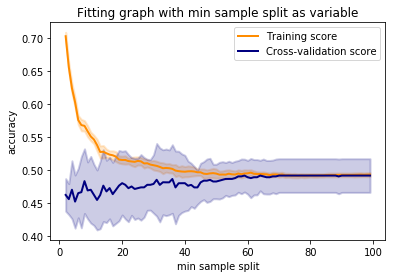

In [23]:
# Testing on Decision Tree variable
from sklearn.model_selection import validation_curve
param_range = np.arange(2,100)
train_scores, test_scores = validation_curve(
    neighbors.KNeighborsClassifier(), 
    X, 
    y,  
    "n_neighbors",
    param_range,
    cv=10
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Fitting graph with min sample split as variable")
plt.xlabel("min sample split")
plt.ylabel("accuracy")
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Hasilnya memperlihatkan bahwa untuk variabel n neighbor paling optimal untuk nilai 20.

#### Final Model

In [24]:
model_knc = neighbors.KNeighborsClassifier(n_neighbors=20, weights='distance', algorithm='kd_tree')
model_knc.fit(X_train, y_train)
y_pred = model_knc.predict(X_test)

cal_accuracy(y_test, y_pred)

Confusion Matrix: 
 [[92 20  3  2  1]
 [39 21  2  6  0]
 [ 8  8  5  3  0]
 [ 8  7  2  3  0]
 [ 0  2  2  0  0]]
Accuracy : 
 51.70940170940172
Report : 
              precision    recall  f1-score   support

          0       0.63      0.78      0.69       118
          1       0.36      0.31      0.33        68
          2       0.36      0.21      0.26        24
          3       0.21      0.15      0.18        20
          4       0.00      0.00      0.00         4

avg / total       0.48      0.52      0.49       234



### Decision Tree

In [25]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion="gini",min_samples_leaf=5)

model_dtc = dtc.fit(data_train, target_train)
y_pred = model_dtc.predict(data_test)

cal_accuracy(target_test, y_pred)

Confusion Matrix: 
 [[82 25 10  1  0]
 [18 31  9 10  0]
 [ 6  5 10  3  0]
 [ 5  6  5  4  0]
 [ 1  0  2  1  0]]
Accuracy : 
 54.27350427350427
Report : 
              precision    recall  f1-score   support

          0       0.73      0.69      0.71       118
          1       0.46      0.46      0.46        68
          2       0.28      0.42      0.33        24
          3       0.21      0.20      0.21        20
          4       0.00      0.00      0.00         4

avg / total       0.55      0.54      0.54       234



/home/thareqyusuf/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Cross Validation

##### Min Samples Split

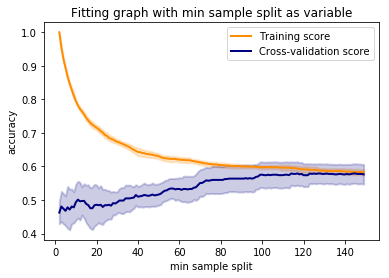

In [26]:
# Testing on Decision Tree variable
from sklearn.model_selection import validation_curve
param_range = np.arange(2,150)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), 
    data, 
    target,  
    "min_samples_split",
    param_range,
    cv=10
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Fitting graph with min sample split as variable")
plt.xlabel("min sample split")
plt.ylabel("accuracy")
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Hasilnya memperlihatkan bahwa untuk variabel min sample split paling optimal untuk nilai 80.

##### Min Samples Leaf

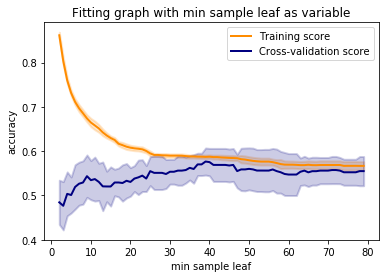

In [27]:
# Testing on Decision Tree variable
from sklearn.model_selection import validation_curve
param_range = np.arange(2,80)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), 
    data, 
    target,  
    "min_samples_leaf",
    param_range,
    cv=10
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Fitting graph with min sample leaf as variable")
plt.xlabel("min sample leaf")
plt.ylabel("accuracy")
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Hasilnya memperlihatkan bahwa untuk variabel min sample leaf paling optimal untuk nilai 40.

#### Final Model

In [28]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion="gini", min_samples_leaf=40, min_samples_split=80)

model_dtc = dtc.fit(data_train, target_train)
y_pred = model_dtc.predict(data_test)

cal_accuracy(target_test, y_pred)

Confusion Matrix: 
 [[99 15  4  0  0]
 [18 47  3  0  0]
 [ 7 14  3  0  0]
 [ 6  9  5  0  0]
 [ 0  3  1  0  0]]
Accuracy : 
 63.67521367521367
Report : 
              precision    recall  f1-score   support

          0       0.76      0.84      0.80       118
          1       0.53      0.69      0.60        68
          2       0.19      0.12      0.15        24
          3       0.00      0.00      0.00        20
          4       0.00      0.00      0.00         4

avg / total       0.56      0.64      0.59       234



/home/thareqyusuf/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Neural Network MLP

In [29]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(120, 30), solver='lbfgs')

model_mlp = mlp.fit(data_train, target_train)
y_pred = model_mlp.predict(data_test)

cal_accuracy(target_test, y_pred)

Confusion Matrix: 
 [[91 18  8  1  0]
 [29 20 10  9  0]
 [ 7 14  2  1  0]
 [ 7  6  4  3  0]
 [ 0  3  0  1  0]]
Accuracy : 
 49.572649572649574
Report : 
              precision    recall  f1-score   support

          0       0.68      0.77      0.72       118
          1       0.33      0.29      0.31        68
          2       0.08      0.08      0.08        24
          3       0.20      0.15      0.17        20
          4       0.00      0.00      0.00         4

avg / total       0.46      0.50      0.48       234



/home/thareqyusuf/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Cross Validation

##### Hidden Layer Sizes

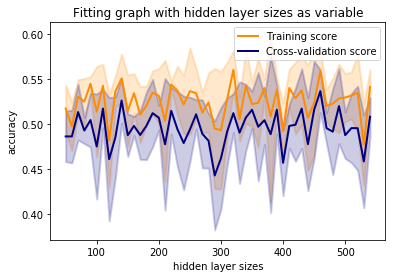

In [30]:
# Testing on Decision Tree variable
from sklearn.model_selection import validation_curve

param_range = []
param = []
for i in range (50) :
    param_range.append(((i*10)+50, 30))
    param.append((i*10)+50)
    
train_scores, test_scores = validation_curve(
    MLPClassifier(), 
    data, 
    target,  
    "hidden_layer_sizes",
    param_range,
    cv=5
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Fitting graph with hidden layer sizes as variable")
plt.xlabel("hidden layer sizes")
plt.ylabel("accuracy")
lw = 2
plt.plot(param, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Hasilnya memperlihatkan bahwa untuk variabel hidden layer sizes bagian pertama tidak terlalu berbeda untuk value pada range 100-600.

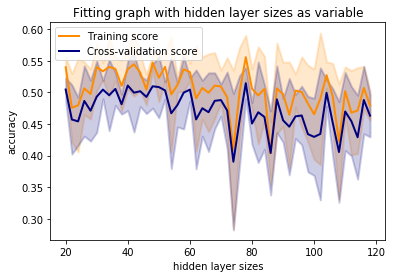

In [31]:
# Testing on Decision Tree variable
from sklearn.model_selection import validation_curve

param_range = []
param = []
for i in range (50) :
    param_range.append((380, (i*2)+20))
    param.append((i*2)+20)
    
train_scores, test_scores = validation_curve(
    MLPClassifier(), 
    data, 
    target,  
    "hidden_layer_sizes",
    param_range,
    cv=5
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Fitting graph with hidden layer sizes as variable")
plt.xlabel("hidden layer sizes")
plt.ylabel("accuracy")
lw = 2
plt.plot(param, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Hasilnya memperlihatkan bahwa untuk variabel hidden layer sizes bagian kedua tidak terlalu berbeda untuk value pada range 20-120.

#### Final Model

In [32]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(380, 28), solver='lbfgs')

model_mlp = mlp.fit(data_train, target_train)
y_pred = model_mlp.predict(data_test)

cal_accuracy(target_test, y_pred)

Confusion Matrix: 
 [[94 15  6  3  0]
 [28 23 11  6  0]
 [ 8 12  4  0  0]
 [ 6  8  3  3  0]
 [ 1  0  1  2  0]]
Accuracy : 
 52.991452991452995
Report : 
              precision    recall  f1-score   support

          0       0.69      0.80      0.74       118
          1       0.40      0.34      0.37        68
          2       0.16      0.17      0.16        24
          3       0.21      0.15      0.18        20
          4       0.00      0.00      0.00         4

avg / total       0.50      0.53      0.51       234



/home/thareqyusuf/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Penjelasan Error

Error terjadi akibat saat split test, testing data tidak ada yang berlabel '4'. Hal ini mengakibatkan rumus f1-score tidak valid dan menghasilkan error. Melihat hal ini, tentu saja error yang sama terjadi pada setiap pegukuran akurasi setiap model.

Untuk menanggulangi hal ini, kelompok kami menyarankan untuk menambahi data agar merata antara jumlah data berlabel '0', '1', '2', '3' dan '4' terutama data berlabel '4' sendiri.

###### Jumlah Data Masing-masing Label

In [33]:
target_count = [0 for i in range (5)]
for label in target :
    target_count[label] += 1

for i in range (5) :
    print("Data berlabel '", i, "' berjumlah ", target_count[i], sep="")

Data berlabel '0' berjumlah 349
Data berlabel '1' berjumlah 225
Data berlabel '2' berjumlah 92
Data berlabel '3' berjumlah 90
Data berlabel '4' berjumlah 23


###### Kesimpulan

Berdasarkan hasil eksplorasi yang kami lakukan di atas, didapatkan bahwa model yang menggunakan Decision Tree Classifier memiliki akurasi paling tinggi yaitu akurasi 58-63 persen. Hal ini bersifat dinamis berdasarkan dari pemilihan data training dan data testing pada saat split data. Menurut kami, algoritma Decision Tree Classifier memiliki parameter yang paling banyak dibandingkan algoritma lain sehingga lebih mudah untuk menghindari model yang overfitting atau underfitting.

## 3. Penyimpanan dan Load Model

Save Model

In [34]:
#Menyimpan Naive Bayes Model
filename = 'nb_model.sav'
pickle.dump(gnb, open(filename, 'wb'))

#Menyimpan kNN Model
filename = 'knn_model.sav'
pickle.dump(model_knc, open(filename, 'wb'))

#Menyimpan Desicion Tree Mode
filename = 'dt_model.sav'
pickle.dump(dtc, open(filename, 'wb'))

#Menyimpan Neural Network MLP
filename = 'nnmlp_model.sav'
pickle.dump(mlp, open(filename, 'wb'))

Load Model

In [35]:
#Memuat Naive Bayes Model
filename = 'nb_model.sav'
NaiveBayesModel = pickle.load(open(filename, 'rb'))

#Memuat kNN Model
filename = 'knn_model.sav'
kNNModel = pickle.load(open(filename, 'rb'))

#Memuat Desicion Tree Model
filename = 'dt_model.sav'
DesicionTreeModel = pickle.load(open(filename, 'rb'))

#Memuat Neural Network MLP
filename = 'nnmlp_model.sav'
NeuralNetworkMLPModel = pickle.load(open(filename, 'rb'))

## 4. Pemakaian Model pada Data Test

Mengisi missing data dengan data yang sama dengan yang diatas

In [36]:
data_test = pd.read_csv("tubes2_HeartDisease_test.csv")
cols = data_test.columns
for c in cols:
    data_test[c] = pd.to_numeric(data_test[c], errors='coerce')
i = 0
for column in data_test:
    for index, row in data_test.iterrows():
        if (pd.isnull(row[column])) :
            if (type(replacer[i]) != str) : 
                data_test.at[index, column] = replacer[i].item()
            else :
                data_test.at[index, column] = replacer[i]
    i += 1

Memproses kolom agar sesuai dengan model

In [37]:
data_test.drop(['Column12', 'Column13'],axis=1, inplace=True)

In [38]:
# use pd.concat to join the new columns with your original dataframe
data_test = pd.concat([data_test,pd.get_dummies(data_test['Column3'], prefix='Column3')],axis=1)
data_test = pd.concat([data_test,pd.get_dummies(data_test['Column7'], prefix='Column7')],axis=1)
data_test = pd.concat([data_test,pd.get_dummies(data_test['Column11'], prefix='Column11')],axis=1)

#delete unused column
data_test.drop(['Column3'],axis=1, inplace=True)
data_test.drop(['Column7'],axis=1, inplace=True)
data_test.drop(['Column11'],axis=1, inplace=True)

In [39]:
data_test.head()

,Column1,Column2,Column4,Column5,Column6,Column8,Column9,Column10,Column3_1,Column3_2,Column3_3,Column3_4,Column7_0,Column7_1,Column7_2,Column11_1.0,Column11_2.0,Column11_3.0
0,60,1,160.0,267.0,1.0,157.0,0.0,0.5,0,1,0,0,0,1,0,0,1,0
1,61,1,148.0,203.0,0.0,161.0,0.0,0.0,0,0,0,1,1,0,0,1,0,0
2,54,1,130.0,242.0,0.0,91.0,1.0,1.0,0,0,0,1,1,0,0,0,1,0
3,48,1,120.0,260.0,0.0,115.0,0.0,2.0,0,0,0,1,1,0,0,0,1,0
4,57,0,130.0,308.0,0.0,98.0,0.0,1.0,1,0,0,0,1,0,0,0,1,0


Melakukan prediksi

In [40]:
result = NaiveBayesModel.predict(data_test)

Hasil prediksi

In [41]:
result

array([0, 0, 1, 1, 0, 4, 4, 4, 0, 3, 1, 1, 0, 0, 0, 4, 2, 0, 0, 0, 0, 2,
       0, 2, 3, 0, 1, 2, 3, 1, 0, 0, 4, 0, 1, 4, 0, 4, 0, 0, 4, 0, 0, 1,
       4, 1, 4, 4, 1, 1, 1, 0, 4, 4, 1, 1, 1, 3, 1, 0, 0, 0, 1, 4, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 4, 4, 2, 0, 4, 4, 4,
       4, 2, 1, 0, 0, 4, 0, 1, 0, 1, 2, 0, 4, 0, 4, 4, 2, 4, 0, 2, 1, 2,
       0, 4, 4, 0, 0, 4, 0, 4, 0, 4, 4, 1, 0, 1, 4, 0, 0, 4, 4, 3, 0, 1,
       2, 3, 4, 4, 0, 0, 0, 1, 0])